In [1]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

### EDA

In [2]:
#1
sales = pd.read_csv('D:/Strive_school/AI_Strive/M4_Feature_Eng/sales_predict/data/sales_train.csv')
sales.name = 'sales'
#2
categories = pd.read_csv('D:/Strive_school/AI_Strive/M4_Feature_Eng/sales_predict/data/categories.csv')
categories.name = 'categories'
#3
items = pd.read_csv('D:/Strive_school/AI_Strive/M4_Feature_Eng/sales_predict/data/items.csv')
items.name = 'items'
#4
ss = pd.read_csv('D:/Strive_school/AI_Strive/M4_Feature_Eng/sales_predict/data/sample_submission.csv')
ss.name = 'ss'
#5
shops = pd.read_csv('D:/Strive_school/AI_Strive/M4_Feature_Eng/sales_predict/data/shops.csv')
shops.name = 'shops'
#6
test = pd.read_csv('D:/Strive_school/AI_Strive/M4_Feature_Eng/sales_predict/data/test.csv')
test.name = 'test'

In [3]:
check = [sales, categories, items, ss, shops, test]
for df in check:
    print(df.name, ':', df.shape)
    display(df.head())
    print('\n')

sales : (2935849, 6)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0




categories : (84, 2)


,category_name,category_id
0,PC - Headsets / Headphones,0
1,Accessories - PS2,1
2,Accessories - PS3,2
3,Accessories - PS4,3
4,Accessories - PSP,4




items : (22170, 3)


,item_id,category_id,item_name
0,0,40,!! IN THE POWER OF HAPPINESS (PLAST) D
1,1,76,! ABBYY FineReader 12 Professional Edition Ful...
2,2,40,*** IN THE GLORY OF THE GLORY (UNV) D
3,3,40,*** BLUE WAVE (Univ) D
4,4,40,*** BOX (GLASS) D




ss : (214200, 2)


,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5




shops : (60, 2)


,shop_name,shop_id
0,"! Yakutsk Ordzhonikidze, 56 francs",0
1,"! Yakutsk TC ""Central"" fran",1
2,"Adygea TC ""Mega""",2
3,"Balashikha TC ""Oktyabr-Kinomir""",3
4,"Volga TC ""Volga Mall""",4




test : (214200, 3)


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [17]:
type(df0['shop_id'])

pandas.core.series.Series

In [4]:
df0 = sales[40:45]

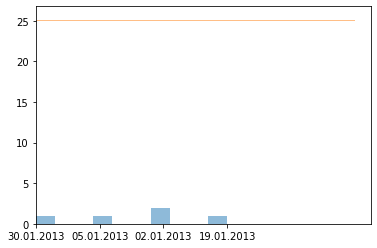

<Figure size 2160x1440 with 0 Axes>

In [5]:
plt.hist(df0['date'], bins=10, alpha=.5)
plt.hist(df0['shop_id'], bins=10, alpha=.5, orientation='horizontal')
plt.figure(figsize=(30,20))
plt.show()

In [6]:
import datetime
sales['date'] = sales['date'].apply(lambda x: datetime.datetime.strptime(x, '%d.%m.%Y'))
sales['date'].sample(10)

1481306   2014-03-02
554184    2013-06-28
1309859   2014-01-05
2502176   2015-03-08
402059    2013-04-15
1863873   2014-07-21
1461090   2014-03-24
668803    2013-07-14
1561101   2014-04-16
2502719   2015-03-02
Name: date, dtype: datetime64[ns]

In [18]:
sales['date']

0         2013-01-02
1         2013-01-03
2         2013-01-05
3         2013-01-06
4         2013-01-15
             ...    
2935844   2015-10-10
2935845   2015-10-09
2935846   2015-10-14
2935847   2015-10-22
2935848   2015-10-03
Name: date, Length: 2935849, dtype: datetime64[ns]

In [10]:
sales['day_of_week'] = sales['date'].apply(lambda x: x.weekday())

In [19]:
sales['day_of_week']

0          2
1          3
2          5
3          6
4          1
          ..
2935844    5
2935845    4
2935846    2
2935847    3
2935848    5
Name: day_of_week, Length: 2935849, dtype: int64

In [12]:
# monday=0 .... sunday=6
sales.day_of_week.value_counts()

5    590359
6    503104
4    439298
3    367280
2    352962
1    345772
0    337074
Name: day_of_week, dtype: int64

<AxesSubplot:>

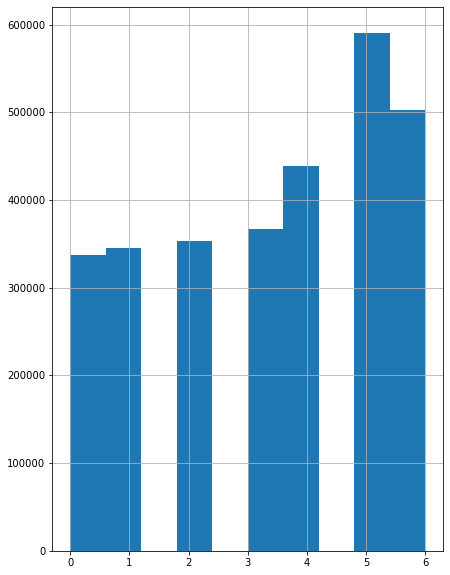

In [22]:
sales.day_of_week.hist(figsize=(7,10))

In [23]:

sales['month_of_year'] = sales['date'].apply(lambda x: x.month)

<AxesSubplot:>

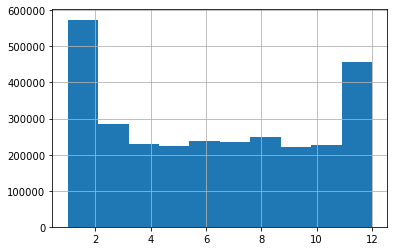

In [24]:
sales.month_of_year.hist()

In [25]:

sales['year'] = sales['date'].apply(lambda x: x.year)

In [26]:
sales.year.sample(10)

806664     2013
2037003    2014
309209     2013
2150187    2014
655943     2013
220305     2013
171183     2013
2293018    2014
1026878    2013
1055736    2013
Name: year, dtype: int64

In [27]:
sales.year.value_counts()

2013    1267562
2014    1055861
2015     612426
Name: year, dtype: int64

In [28]:
#groupby montly sales
monthly_sales = sales.groupby(["date_block_num","shop_id","item_id"])["date","item_price","item_cnt_day"].agg({"date":["min",'max'],"item_price":"mean","item_cnt_day":"sum"})
monthly_sales.sample(10)

<ipython-input-28-ab62b5ed2403>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  monthly_sales = sales.groupby(["date_block_num","shop_id","item_id"])["date","item_price","item_cnt_day"].agg({"date":["min",'max'],"item_price":"mean","item_cnt_day":"sum"})


date            item_price item_cnt_day
                                      min        max       mean          sum
date_block_num shop_id item_id                                              
31             6       15866   2015-08-29 2015-08-29     1299.0          1.0
0              4       20249   2013-01-11 2013-01-11      299.0          1.0
13             50      12033   2014-02-23 2014-02-23       99.0          1.0
14             42      4499    2014-03-13 2014-03-13     1249.0          1.0
7              31      11832   2013-08-08 2013-08-08       60.0          1.0
3              37      14574   2013-04-13 2013-04-25      349.0          3.0
9              21      16902   2013-10-20 2013-10-20      149.0          1.0
23             54      13542   2014-12-10 2014-12-30     4599.0          4.0
11             43      12132   2013-12-19 2013-12-19     2199.0          1.0
28             27      20377   2015-05-19 2015-05-19     1899.0          1.0

In [30]:
# groupby num of items per cat
cat = items.groupby(['category_id']).count()
cat = cat.sort_values(by = 'item_id', ascending = False)
cat

,item_id,item_name
category_id,,
40,5035,5035
55,2365,2365
37,1780,1780
31,1125,1125
58,790,790
...,...,...
1,2,2
50,2,2
10,1,1


In [35]:

plt.figure(figsize=(8,5))
sns.barplot(cat.category_id, cat.item_id)
plt.title("Items per categories")
plt.ylabel("Items")
plt.xlabel('Category')

AttributeError: 'DataFrame' object has no attribute 'category_id'

<Figure size 576x360 with 0 Axes>